In [1]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from rich import print as rprint
from rich.traceback import install
install()

<bound method InteractiveShell.excepthook of <ipykernel.zmqshell.ZMQInteractiveShell object at 0x7f474b188a00>>

In [2]:
%load_ext autoreload
%autoreload 2

In [85]:
embed_dim = 200
num_heads = 8
head_dim = 32
max_length_q= 234
max_length_k= 345
padding_idx = 0
dropout_p = 0.1

batch_size = 3
q = torch.randn(batch_size, num_heads, max_length_q, head_dim)
k = torch.randn(batch_size, num_heads, max_length_k, head_dim)

## Enformer

In [86]:
from positional_embedding import EnformerPositionalEmbedding

In [87]:
pe = EnformerPositionalEmbedding(
    num_heads=num_heads,
    head_dim=head_dim,
    dropout_p=dropout_p,
)

In [88]:
pe.forward_attn(q, k, positions_q=None, positions_k=None).shape

torch.Size([345, 256])


torch.Size([345, 234])

## T5 relative positional embedding

In [89]:
from positional_embedding import T5PositionalEmbedding

torch.Size([1, 64, 128, 128])

<AxesSubplot:>

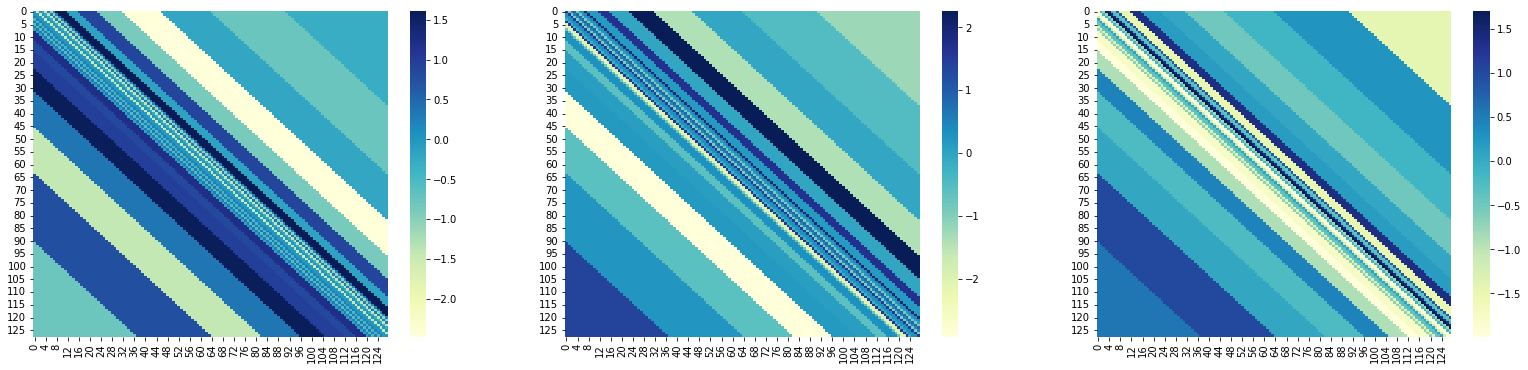

In [2]:
pe = T5PositionalEmbedding(num_buckets=32, n_heads=64)
k_length, q_length = 128, 128
pe_res = pe.compute_bias(k_length, q_length)
rprint(pe_res.shape)
fig, axs = plt.subplots(1, 3, figsize=(27, 6))
sns.heatmap(pe_res.detach().numpy()[0, 0], cmap="YlGnBu", ax=axs[0])
sns.heatmap(pe_res.detach().numpy()[0, 1], cmap="YlGnBu", ax=axs[1])
sns.heatmap(pe_res.detach().numpy()[0, 2], cmap="YlGnBu", ax=axs[2])

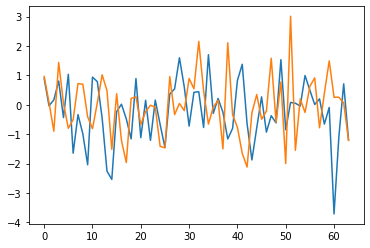

In [3]:
plt.plot(pe_res.detach().numpy()[0, :, 20, 40])
plt.plot(pe_res.detach().numpy()[0, :, 40, 20])

## Transformer XL relative positional embedding

In [3]:
model_dim = 512
num_heads = 8
head_dim = 64
pe = TransformerXLPositionalEmbedding(model_dim=model_dim, num_heads=8, head_dim=64, dropout_p=0.1)
k_length = 128
q = torch.randn(2, num_heads, k_length, head_dim)
k = torch.randn(2, num_heads, k_length, head_dim)
pos_seq = torch.arange(k_length - 1, -1, -1.0)
rprint(pe(pos_seq, q, k).shape)


torch.Size([2, 8, 128, 128])

## Sinusoidal positional embedding

In [7]:
pe = SinusoidalPositionalEmbedding(num_embeddings=1024, embedding_dim=256, padding_idx=0)
input_ = torch.randint(1, 20, (3, 100))
pe_res = pe(input_)
rprint("pe_res shape:", pe_res.shape)

pe_res shape:
torch.Size([3, 100, 256])

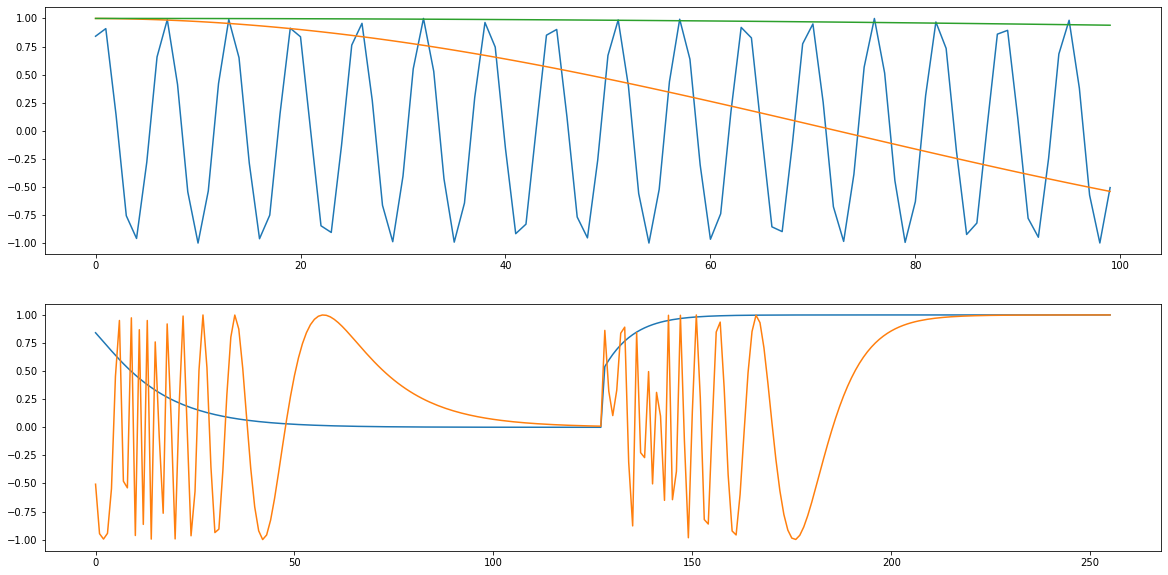

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(20, 10))
axs[0].plot(pe_res.detach().numpy()[0, :, 0])
axs[0].plot(pe_res.detach().numpy()[0, :, -75])
axs[0].plot(pe_res.detach().numpy()[0, :, -50])

axs[1].plot(pe_res.detach().numpy()[0, 0])
axs[1].plot(pe_res.detach().numpy()[0, -1])

<AxesSubplot:>

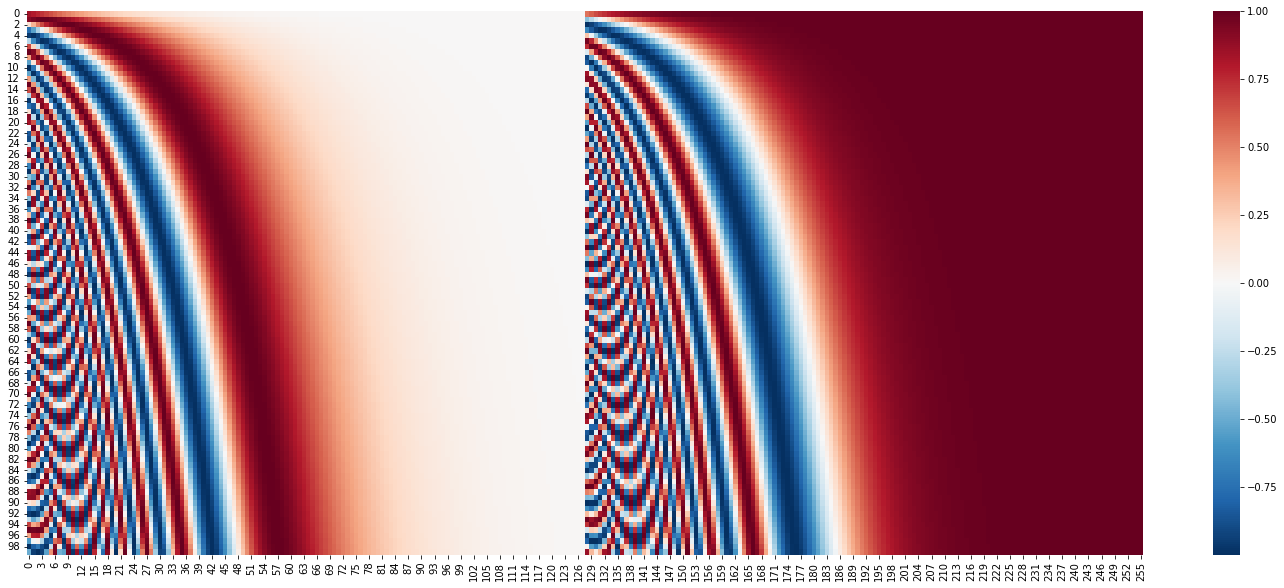

In [9]:
fig, axs = plt.subplots(1, 1, figsize=(25, 10))
sns.heatmap(pe_res.detach().numpy()[0, :, :], cmap="RdBu_r", ax=axs)

## Learned positional embedding

In [5]:
pe = LearnedPositionalEmbedding(num_embeddings = 1024, embedding_dim=16, padding_idx=30)
input_ = input_ = torch.randint(1, 20, (3, 100))
pe_res = pe(input_)
rprint("pe_res shape:", pe_res.shape)

pe_res shape:
torch.Size([3, 64, 16])

## Transformer XL relative positional embedding

In [15]:
q = torch.randn(3,4,5,6)
k = torch.randn(3,4,5,6)
r = torch.randn(1, 4, 1, 6)

d = torch.einsum("bhqd, bhkd -> bhqk", q, k)
e = torch.einsum("bhqd, bhkd -> bhqk", r.expand_as(k), k)
f = torch.einsum("bhqd, bhkd -> bhqk", q + r, k)


In [22]:
torch.isclose(d + e, f).all()

tensor(True)